##### <h1 style="text-align:center"> Drexel University </h1>
<h2 style = "text-align:center"> College of Computing and Informatics</h2>
<h2 style = "text-align:center">DSCI 631: Applied Machine Learning for Data Science</h2>
<h3 style = "text-align:center">Assignment 1</h3>
<h4> </h4>
<div style="text-align:center; border-style:solid; padding: 10px">

### TEAM MEMBERS:
<h5 style="color:green; font-weight:bold; ">Ramar Huntley : rh877@drexel.edu, </h5>
<h5 style="color:green; font-weight:bold; ">Kim Dineen : kd975@drexel.edu, </h5>
<h5 style="color:green; font-weight:bold; "> Bahram Khodabandehlouee : Student ID: 14536253 : bk668@drexel.edu 
</h5>

### A. Assignment Overview
This assignment provides the opportunity for you to practice with various skills in data pre-processing, feature analyses, making machine learning precessing pipeline. 

### B. What to Hand In
	
Sumbit a completed this Jupyter notebook. 

### C. How to Hand In

Submit your Jupyter notebook file through the course website in the Blackboard Learn system.

### D. When to Hand In

1. Submit your assignment no later than 11:59 pm in the due date.
2. There will be a 10% (absolute value) deduction for each day of lateness, to a maximum of 3 days; assignments will not be accepted beyond that point. Missing work will earn a zero grade.

### E. Written Presentation Requirements (if applicable)
Images must be clear and legible. Assignments will be judged on the basis of visual appearance, grammatical correctness, and quality of writing, as well as their contents. Please make sure that the text of your assignments is well-structured, using paragraphs, full sentences, and other features of well-written presentation.

### F. Academic Honesty

Each student is required to submit the Academic Honesty Form at the beginning of the term to cover all the deliverables (for example: assignments, projects, quizzes). Each piece of work must be original. That means, individual quizzes must be done individually without discussing and collaborating with anybody else. Team assignments must be written and programmed by your own team members. No team should copy any piece of work from other teams. The Drexel University Academic Honesty Rules and Procedures (as stated in the student handbook) will be adhered to strictly.  

### G. Marking Schemes:

Marking assignments will be based on several aspects: presentation, correctness and coding styles. 

For programming questions, 10% of the mark will be judged on the coding style. 

The following is a set of guidelines for the coding style in this course:
1. Write a good comment.
2. Use appropriate indentations to indicate control flows and blocks of code. 
3. When breaking up a long line, break it before an operator, not after. 

### H. Answer the following questions: 
**Your answer should be combined with code and brief text answer.** Please ensure that your Jupyter notebook does not have too much spurious output. If you like, you can share your notebook in progress with me on Kaggle: leiwangv (lw474@drexel.edu)

### Data for this assignment:
* URL: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv
* On Kaggel Notebook, you can add the data set by searching the above URL
* Column “price” is the target variable to predict.


In [1]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
import pandas as pd

# path to the dataset on Github
path = "https://raw.githubusercontent.com/Bahram-khoda/DSCI---631-/main/AB_NYC_2019.csv"

df = pd.read_csv(path)

#### Question 1:
Examine the features of the data. Identify which feature is continuous and which feature is categorical. Make some analyses and use your analyses to discuss whether each feature could be useful for predicting the "price."

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
df_backup = df


based on df.info(), columns: ```name```, ```host_name``` , ```neighbourhood_group``` , ```neighbourhood``` , ```room_type```, ```last_review``` are **categorical**, but the rest of the columns are **continuous** of types *int* and *float*

In [12]:
# we can take a look and see Airbnb is extended among how many neighborhood_group and neighborhood
print("we have:", len(df['neighbourhood_group'].unique()),"neighbourhood_group"+ 
      "and", len(df['neighbourhood'].unique()), " neighbourhood")

we have: 5 neighbourhood_groupand 221  neighbourhood


In [13]:
# take a look how many Airbnb place we have in each neighbourhood_group
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

As we see, **Manhattan** and **Brooklyn** have the most Airbnb locations

In [14]:
# take a look how many Airbnb place we have in each neighbourhood
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

<ipython-input-17-6a665b373609>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_correlations = df_interest.corr()


<Axes: >

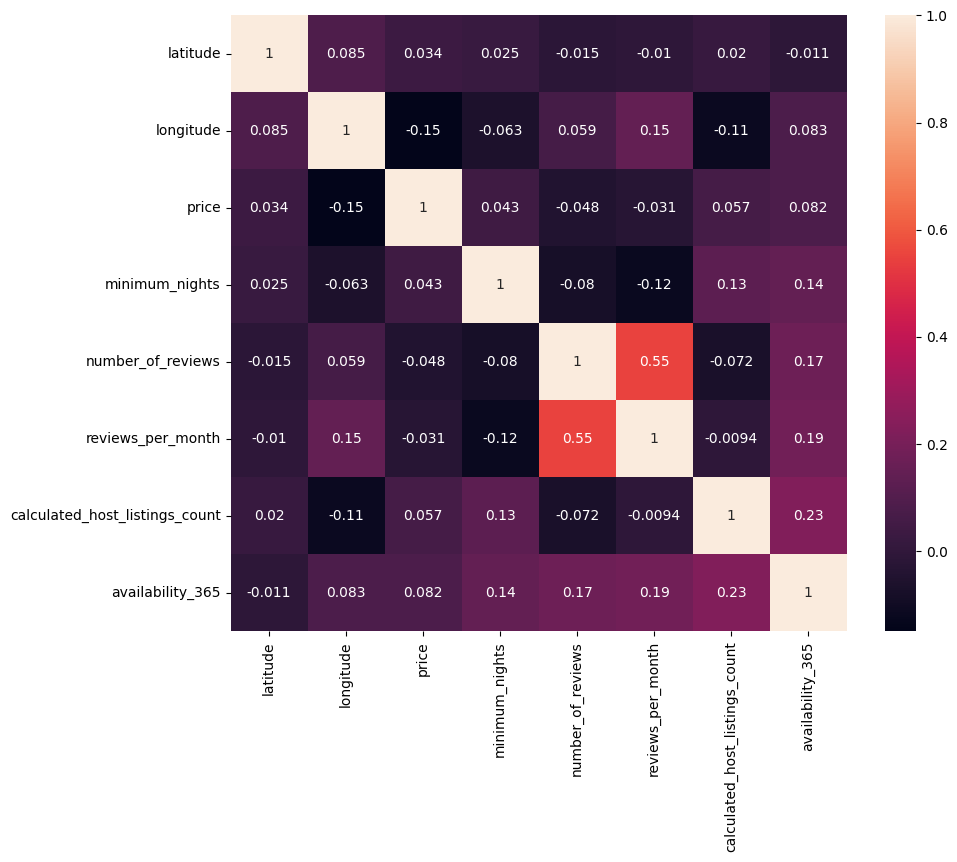

In [17]:
#to show pairwise relationships among variables we use a grid of scatterplots for each pair of variables. we use Seaborn library to do this.
import seaborn as sns
import matplotlib.pyplot as plt

# we sellect columns that are more important to do analysis and predictions rather that columns such as id, name, etc.
df_interesting_columns = ["neighbourhood_group","neighbourhood","latitude","longitude","room_type",
 "price","minimum_nights","number_of_reviews","last_review","reviews_per_month",
 "calculated_host_listings_count","availability_365"]
df_interest = df[df_interesting_columns].copy()

# we use panda's corr() method to compute pairwise correlations among all columns
df_correlations = df_interest.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_correlations, annot=True, square=True)

in the result from heatmap, A feature that neither highly correlated with price feature nore not correlated with price feature, 
will be more interesting in price prediction, in this result, **longitude** and **room_type** have significant negative correlation with ```price```. however,t there are some features that can still be useful in predicting the price target. NOte: .corr() method in pandas, converts categoricall attributes into numerical, so we can see them in this heatmap.

#### Question 2:
Create plots to visualize the distribution of the target "price" vs the distribution of  each predictors. Do you notice anything that might require special treatment? Discuss your findings and suggestions on wrangling the data for the prediction task.

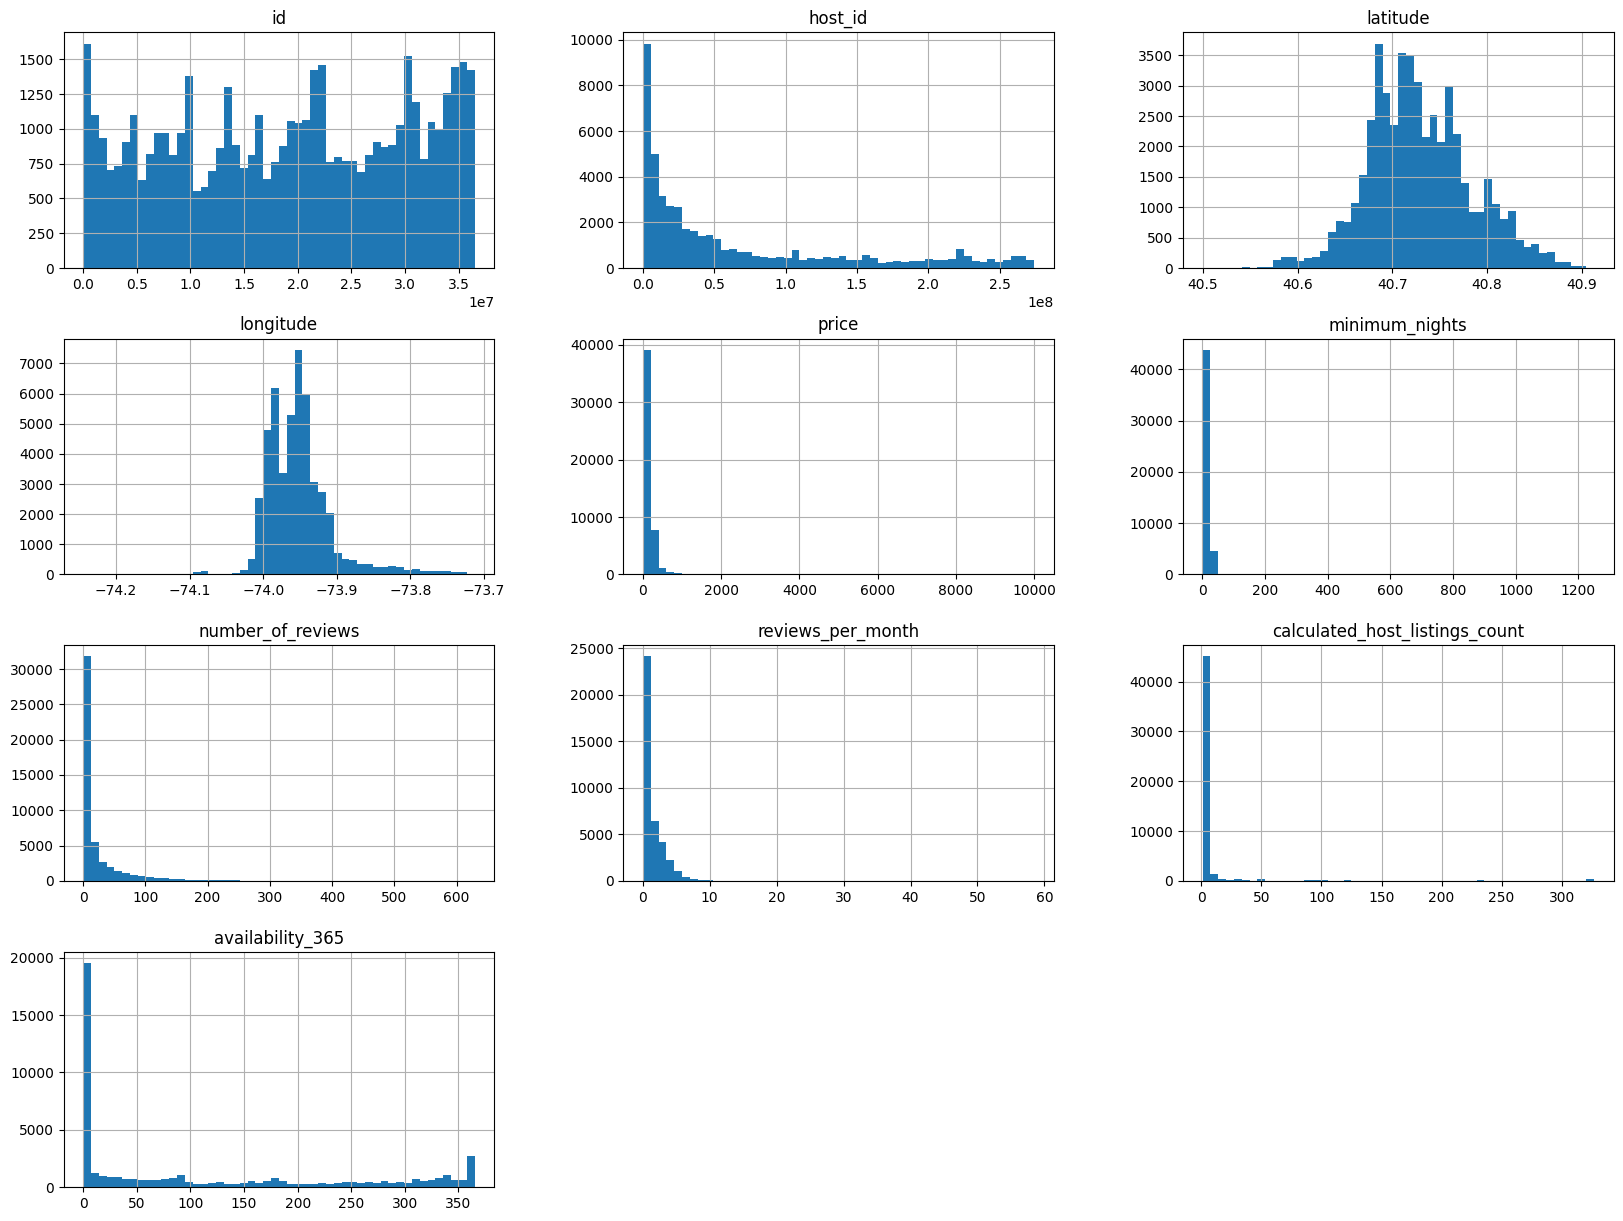

In [ ]:
# plot a histogram for each numerical attribute to start
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Only longitude and latutude have bell-shaped distributions while most of the other charts are skewed. The combination of longitute and latitude should reflected in both the neighbourhood_group and neighbourhood features which may be a promising lead for a predictor.

In [ ]:
#determining correlation with numerical features and price 
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

<ipython-input-220-6264cae7c5a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='availability_365', ylabel='price'>,
        <Axes: xlabel='calculated_host_listings_count', ylabel='price'>,
        <Axes: xlabel='minimum_nights', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='availability_365'>,
        <Axes: xlabel='availability_365', ylabel='availability_365'>,
        <Axes: xlabel='calculated_host_listings_count', ylabel='availability_365'>,
        <Axes: xlabel='minimum_nights', ylabel='availability_365'>],
       [<Axes: xlabel='price', ylabel='calculated_host_listings_count'>,
        <Axes: xlabel='availability_365', ylabel='calculated_host_listings_count'>,
        <Axes: xlabel='calculated_host_listings_count', ylabel='calculated_host_listings_count'>,
        <Axes: xlabel='minimum_nights', ylabel='calculated_host_listings_count'>],
       [<Axes: xlabel='price', ylabel='minimum_nights'>,
        <Axes: xlabel='availability_365', ylabel='minimum_nights'>,
        <Axes: xl

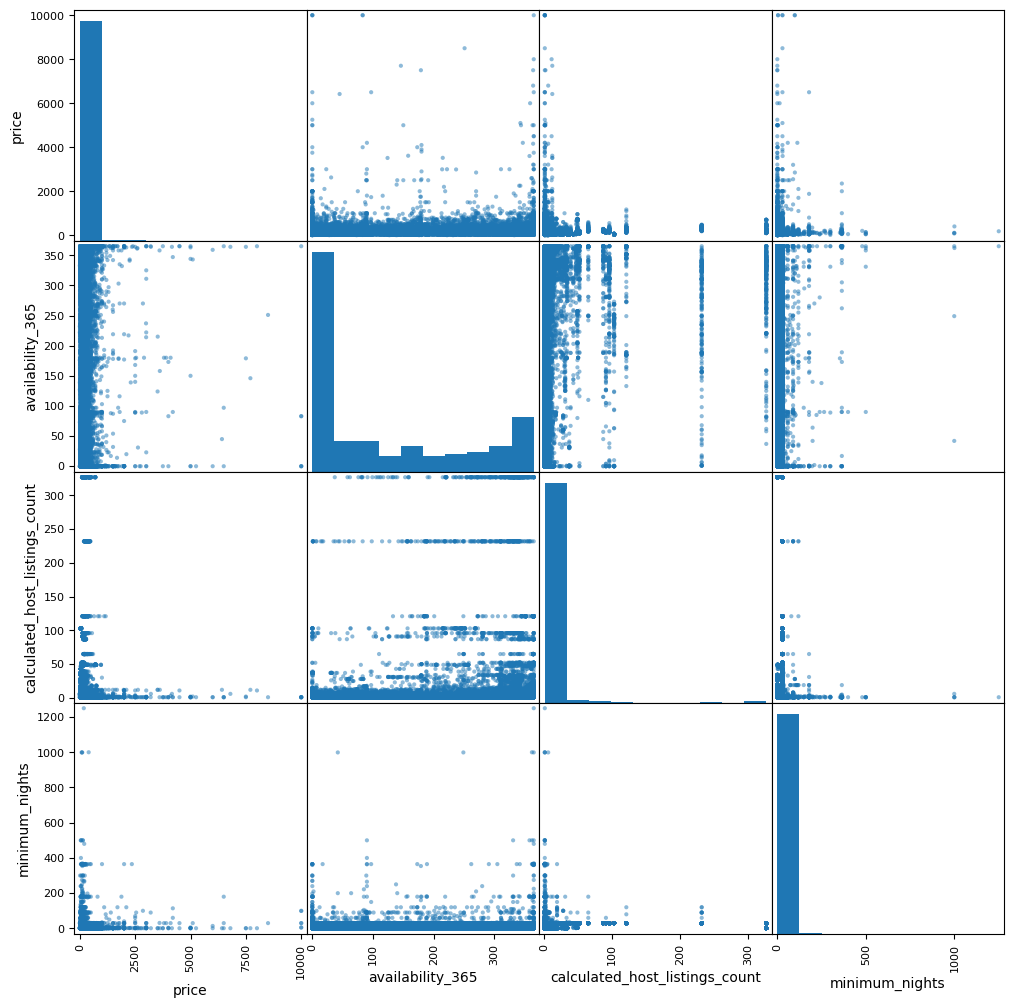

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "availability_365", "calculated_host_listings_count",
              "minimum_nights"]
scatter_matrix(df[attributes], figsize=(12, 12))

In [ ]:
# Common imports
import numpy as np

# To plot 
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


### Graphing categorical features not present in histograms above to see if we can visually find a feature that may have a stronger correlation than any of the numerical features

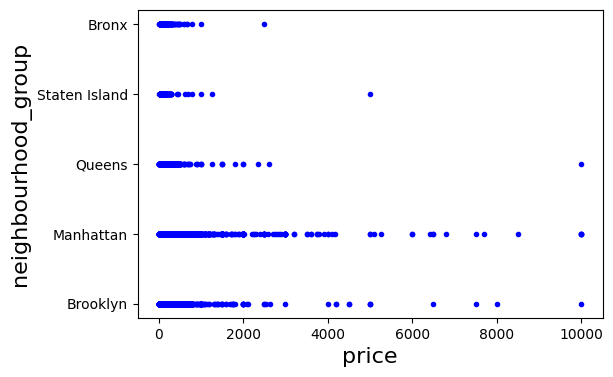

In [ ]:
#starting off with neighbourhood_group

X = df['price']
y = df["neighbourhood_group"]

plt.figure(figsize=(6,4))
plt.plot(X, y, "b.")
plt.xlabel("price", fontsize=16)
plt.ylabel("neighbourhood_group", fontsize=16)
plt.show()

In [ ]:
#next taking a look at specific neighbourhoods
#applying encoder to neighbourhood so the y axis isn't overwhelmed with all 200+ names
from sklearn.preprocessing import OrdinalEncoder
neighbourhood = df[["neighbourhood"]]
neighbourhood_encoded = ordinal_encoder.fit_transform(neighbourhood)

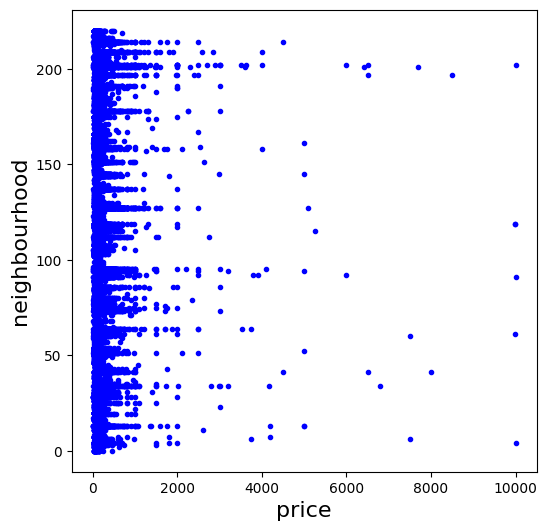

In [ ]:
X = df['price']
y = neighbourhood_encoded
plt.figure(figsize=(6,6))
plt.plot(X, y, "b.")
plt.xlabel("price", fontsize=16)
plt.ylabel("neighbourhood", fontsize=16)
plt.show()

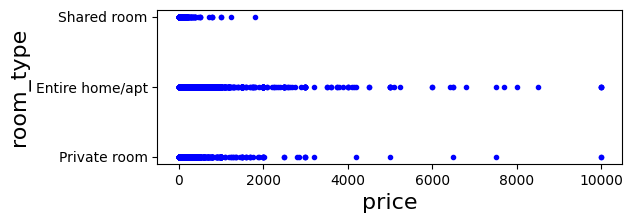

In [ ]:
X = df['price']
y = df['room_type']
plt.figure(figsize=(6,2))
plt.plot(X, y, "b.")
plt.xlabel("price", fontsize=16)
plt.ylabel("room_type", fontsize=16)
plt.show()

Overall based off of the graphs it looks like neighbourhood_group may be the most promising predictor value as there is not a strong correlation between price and any of the numerical features(closest positive correlation is availability_365 with 0.081829 and closest negative correlation is longitude with -0.150019).                      

#### Question 3: 
Split the data into train and test data, What parameters do you use for splitting the data? Why? Do you apply stratified sampling? Why or Why not?

#### Using neighbourhood_group as the predictor value for price

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=.25, random_state=42)

#test size set to .25 to test a smaller portion of the data as there are over 48,000 entries in this dataset 

In [ ]:
test_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2019-01-02,0.71,1,189
44383,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73
15394,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,2017-04-28,0.43,1,0
43230,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2019-06-02,1.88,327,272
16332,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,2019-06-03,0.80,1,30


#### Creating the training/test set

In [ ]:
strat_train_set, strat_test_set = train_test_split(df, test_size=.25, random_state=42, 
                                         stratify = df["neighbourhood_group"])

#### Stratified sampling will help is in dividing the data into sub groups by neighbourhood_group as this is the predictor we would like to focus on. The neighbourhood_group price averages are going to be different and we want to see compare the neighbourhood_groups as an entity for predicting price or else if we did not use stratified sampling we would be better off using the specific neighbourhoods as the predictor.

In [ ]:
#realize stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.25, random_state=42)
for train_index, test_index in split.split(df, df["neighbourhood_group"]):
    strat_train_set1 = df.loc[train_index]
    strat_test_set1 = df.loc[test_index]

In [ ]:
def neighbourhood_group_proportions(df):
    return df["neighbourhood_group"].value_counts() / len(df)

train_set, test_set = train_test_split(df, test_size=.25, random_state=42)

compare_props = pd.DataFrame({
    "Overall": neighbourhood_group_proportions(df),
    "Stratified": neighbourhood_group_proportions(strat_test_set), # train_test_split
    "Stratified1": neighbourhood_group_proportions(strat_test_set1), #StratifiedShuffleSplit
    "Random": neighbourhood_group_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Stratified1,Random,Rand. %error,Strat. %error
Bronx,0.022313,0.022333,0.022333,0.023478,5.222413,0.089612
Brooklyn,0.411167,0.411158,0.411158,0.408541,-0.638721,-0.002045
Manhattan,0.443011,0.442981,0.442981,0.440854,-0.486777,-0.006662
Queens,0.115881,0.115920,0.115920,0.118701,2.433486,0.033252
Staten Island,0.007629,0.007608,0.007608,0.008426,10.453505,-0.270136


Based off the chart above we can see that the stratified % error is greatly closer to 0 thant the random % error which supports the decision to use stratified sampling

In [ ]:
#neighbourhood_group is categorical so we are using the ordinal encoder class to prep the data for future analysis with price
ordinal_encoder = OrdinalEncoder()
neighbourhood_group = df[["neighbourhood_group"]]
neighbourhood_group_encoded = ordinal_encoder.fit_transform(neighbourhood_group)
neighbourhood_group_encoded[:5]

array([[1.],
       [2.],
       [2.],
       [1.],
       [2.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

neighbourhood_group_encoder = OneHotEncoder()
neighbourhood_group_1hot = neighbourhood_group_encoder.fit_transform(neighbourhood_group)
neighbourhood_group_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
neighbourhood_group_encoder.categories_

[array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object)]

#### Question 4:
For the features you have identified that could be useful for predicting the "price", which ones have missing values? Should we drop the instances with missing values or should we impute? If choose to impute, what strategies would you choose and why? apply your strategy

Since the reviews per month column seems to be missing some values, we should impute these values since they may indicate popularity of Airbnb listing, which would help us predict the price.

In [ ]:
df = strat_train_set.drop("price", axis=1)
df_labels = strat_train_set["price"].copy()

In [ ]:
df.count()

id                                36671
name                              36662
host_id                           36671
host_name                         36656
neighbourhood_group               36671
neighbourhood                     36671
latitude                          36671
longitude                         36671
room_type                         36671
minimum_nights                    36671
number_of_reviews                 36671
last_review                       29185
reviews_per_month                 29185
calculated_host_listings_count    36671
availability_365                  36671
dtype: int64

In [ ]:
df.isnull().sum()

id                                   0
name                                 9
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       7486
reviews_per_month                 7486
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36671 entries, 46356 to 33910
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36671 non-null  int64  
 1   name                            36662 non-null  object 
 2   host_id                         36671 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             36671 non-null  object 
 5   neighbourhood                   36671 non-null  object 
 6   latitude                        36671 non-null  float64
 7   longitude                       36671 non-null  float64
 8   room_type                       36671 non-null  object 
 9   minimum_nights                  36671 non-null  int64  
 10  number_of_reviews               36671 non-null  int64  
 11  last_review                     29185 non-null  object 
 12  reviews_per_month           

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_num = df.drop(columns=['id', 'name', 'host_id','host_name', 'neighbourhood_group','neighbourhood', 'room_type', 'last_review'], axis=1)
imputer.fit(df_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_ == df_num.median().values

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
imputer.strategy

'median'

In [ ]:
X = imputer.transform(df_num)

df_tr = pd.DataFrame(X, columns=df_num.columns, index=df_num.index)
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36671 entries, 46356 to 33910
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        36671 non-null  float64
 1   longitude                       36671 non-null  float64
 2   minimum_nights                  36671 non-null  float64
 3   number_of_reviews               36671 non-null  float64
 4   reviews_per_month               36671 non-null  float64
 5   calculated_host_listings_count  36671 non-null  float64
 6   availability_365                36671 non-null  float64
dtypes: float64(7)
memory usage: 2.2 MB


In [ ]:
df_cat = df[['id', 'name', 'host_id','host_name', 'neighbourhood_group','neighbourhood', 'room_type', 'last_review']]
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded[:5]

array([[3.4747e+04, 2.9630e+03, 2.8741e+04, 5.2210e+03, 2.0000e+00,
        9.5000e+01, 0.0000e+00, 1.6860e+03],
       [3.1847e+04, 2.2234e+04, 2.5476e+04, 5.9800e+02, 2.0000e+00,
        1.1200e+02, 0.0000e+00,        nan],
       [1.3730e+03, 3.1045e+04, 5.3150e+03, 5.6690e+03, 2.0000e+00,
        2.0900e+02, 0.0000e+00, 1.1420e+03],
       [2.5639e+04, 3.5145e+04, 2.2323e+04, 1.6100e+03, 2.0000e+00,
        2.0200e+02, 0.0000e+00,        nan],
       [2.7852e+04, 3.1271e+04, 2.4197e+04, 4.5890e+03, 3.0000e+00,
        1.8900e+02, 1.0000e+00, 1.5410e+03]])

In [ ]:
ordinal_encoder.categories_

[array([    2539,     2595,     3647, ..., 36485431, 36485609, 36487245]),
 array([' 2-3 bedroom UWS garden triplex ',
        ' A charming Space in Brooklyn ',
        ' AMAZING TIME SQUARE!!BRICK WALLS!!', ...,
        'ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2',
        'ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡', nan], dtype=object),
 array([     2438,      2571,      2787, ..., 274307600, 274311461,
        274321313]),
 array(["'Cil", '(Ari) HENRY LEE', '(Email hidden by Airbnb)', ..., '진',
        '현선', nan], dtype=object),
 array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
       dtype=object),
 array(['Allerton', 'Arden Heights', 'Arrochar', 'Arverne', 'Astoria',
        'Bath Beach', 'Battery Park City', 'Bay Ridge', 'Bay Terrace',
        'Bay Terrace, Staten Island', 'Baychester', 'Bayside', 'Bayswater',
        'Bedford-Stuyvesant', 'Belle Harbor', 'Bellerose', 'Belmont',
        'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park',
        'Breezy Point', 'Bri

#### Question 5: 
Build Pipeline, apply transformer as needed, train Linear Regression and Decision Tree models with default parameters, make predictions on test set. Discuss your results and findings.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_num)

In [ ]:
from sklearn.compose import ColumnTransformer
num_attribs = list(df_num)
cat_attribs = ['id', 'name', 'host_id','host_name', 'neighbourhood_group','neighbourhood', 'room_type', 'last_review']

full_pipeline = ColumnTransformer([
  ("num", num_pipeline, num_attribs),
  ("cat", OneHotEncoder(), cat_attribs)
                                   
])

df_prepared = full_pipeline.fit_transform(df)

In [ ]:
df_prepared.shape

(36671, 113419)

In [ ]:
full_pipeline.get_feature_names_out()

array(['num__latitude', 'num__longitude', 'num__minimum_nights', ...,
       'cat__last_review_2019-07-07', 'cat__last_review_2019-07-08',
       'cat__last_review_nan'], dtype=object)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_prepared,df_labels)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error

df_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.22793642113469292

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(df_labels, df_predictions)
lin_mae

0.1132984220121579

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(df_prepared, df_labels)

df_predictions = tree_reg.predict(df_prepared)
tree_mse = mean_squared_error(df_labels, df_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Quesetion 6:
Choose two columns of `X_train`, apply differnt feature scaling methods (Sandard scalar, MinMax Scalar, Robust Scalar) introduced in Week 1 Jupyter Notebook on them. Compare the data distribution after scaling with original value using visualization.

In [ ]:
df_tr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
46356,40.75917,-73.99785,2.0,4.0,4.00,1.0,44.0
42456,40.73867,-73.98039,4.0,0.0,0.71,1.0,8.0
1823,40.73227,-74.00949,7.0,38.0,0.54,1.0,302.0
34134,40.78802,-73.97253,2.0,0.0,0.71,2.0,38.0
37071,40.73660,-73.92358,30.0,1.0,0.19,103.0,252.0
...,...,...,...,...,...,...,...
20222,40.77572,-73.93390,5.0,2.0,0.07,2.0,0.0
6001,40.73220,-74.00423,30.0,7.0,0.13,1.0,251.0
12635,40.74106,-73.97818,3.0,2.0,0.05,1.0,0.0
42960,40.70632,-73.91876,1.0,5.0,1.46,1.0,178.0


In [ ]:
df_backup

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df_tr['price'] = df_backup['price']

In [ ]:
df_tr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
46356,40.75917,-73.99785,2.0,4.0,4.00,1.0,44.0,305
42456,40.73867,-73.98039,4.0,0.0,0.71,1.0,8.0,55
1823,40.73227,-74.00949,7.0,38.0,0.54,1.0,302.0,340
34134,40.78802,-73.97253,2.0,0.0,0.71,2.0,38.0,250
37071,40.73660,-73.92358,30.0,1.0,0.19,103.0,252.0,39
...,...,...,...,...,...,...,...,...
20222,40.77572,-73.93390,5.0,2.0,0.07,2.0,0.0,150
6001,40.73220,-74.00423,30.0,7.0,0.13,1.0,251.0,115
12635,40.74106,-73.97818,3.0,2.0,0.05,1.0,0.0,150
42960,40.70632,-73.91876,1.0,5.0,1.46,1.0,178.0,199


In [ ]:
# using Standard Scaler

df_modified = df_tr[['number_of_reviews','reviews_per_month', 'price']]

num_pipeline2 = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ("std_scaler", StandardScaler()),
    ])

df_scaler1 = num_pipeline2.fit_transform(df_modified)


,number_of_reviews,reviews_per_month,price
count,3.667100e+04,3.667100e+04,3.667100e+04
mean,-2.102312e-17,1.453211e-18,1.395083e-17
std,1.000014e+00,1.000014e+00,1.000014e+00
min,-5.247726e-01,-8.016987e-01,-6.426001e-01
25%,-5.023491e-01,-6.320856e-01,-3.508415e-01
50%,-4.126549e-01,-3.450479e-01,-1.986196e-01
75%,1.339262e-02,2.355510e-01,9.736736e-02
max,1.357964e+01,3.735474e+01,4.164125e+01


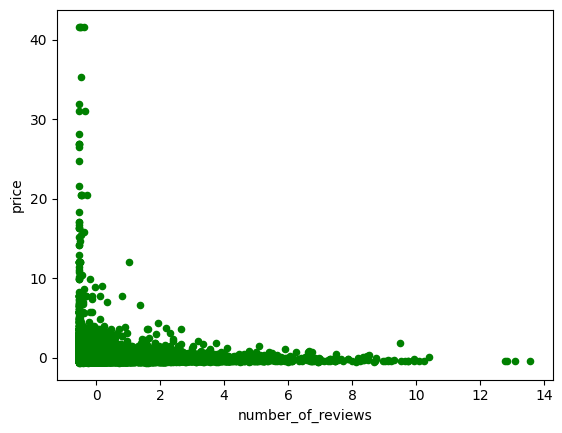

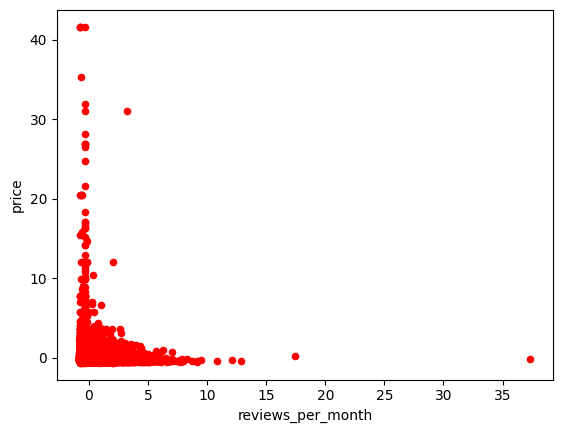

In [ ]:
df_scaled = pd.DataFrame(df_scaler1, columns=['number_of_reviews','reviews_per_month', 'price'])
df_scaled.plot(kind='scatter',x='number_of_reviews', y='price', color='green')
df_scaled.plot(kind='scatter', x='reviews_per_month', y='price', color='red')
df_scaled.describe()

,number_of_reviews,reviews_per_month,price
count,36671.000000,36671.000000,36671.000000
mean,0.037206,0.021011,0.015197
std,0.070901,0.026208,0.023650
min,0.000000,0.000000,0.000000
25%,0.001590,0.004445,0.006900
50%,0.007949,0.011968,0.010500
75%,0.038156,0.027184,0.017500
max,1.000000,1.000000,1.000000


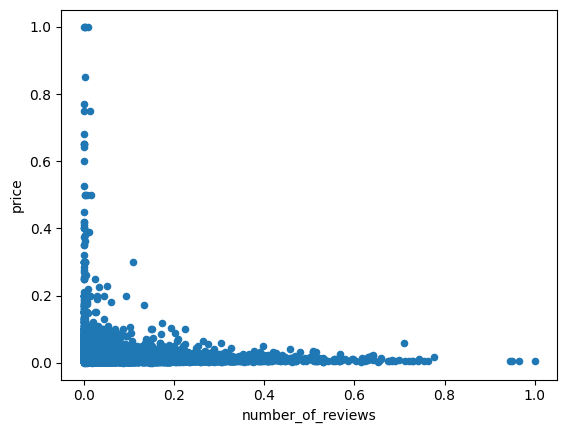

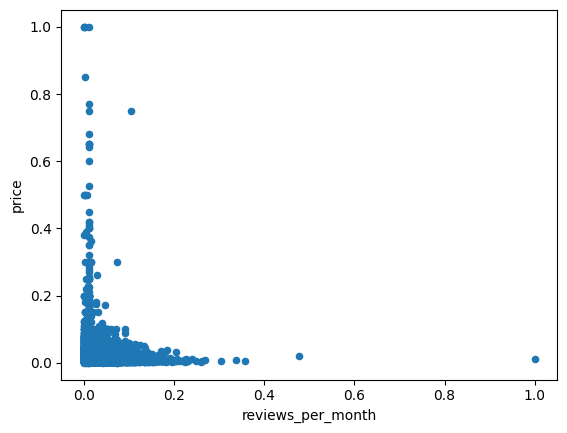

In [ ]:
# Using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

num_pipeline2 = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ("minmax_scaler", MinMaxScaler()),
    ])

df_scaler2 = num_pipeline2.fit_transform(df_modified)

df_scaled2 = pd.DataFrame(df_scaler2, columns=['number_of_reviews','reviews_per_month', 'price'])
df_scaled2.plot(kind='scatter', x='number_of_reviews', y='price')
df_scaled2.plot(kind='scatter', x='reviews_per_month', y='price')
df_scaled2.describe()

,number_of_reviews,reviews_per_month,price
count,36671.000000,36671.000000,36671.000000
mean,0.800119,0.397687,0.443141
std,1.938982,1.152572,2.231133
min,-0.217391,-0.526316,-0.990566
25%,-0.173913,-0.330827,-0.339623
50%,0.000000,0.000000,0.000000
75%,0.826087,0.669173,0.660377
max,27.130435,43.451128,93.349057


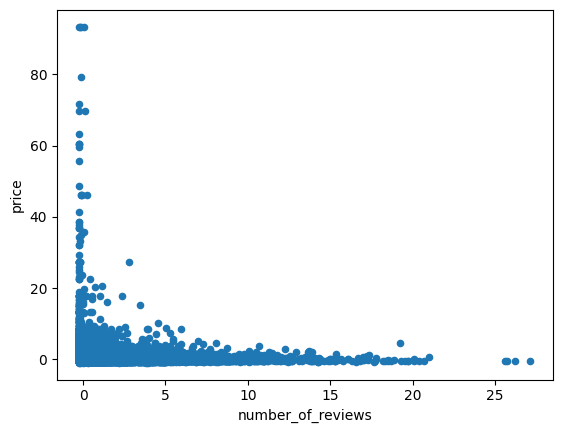

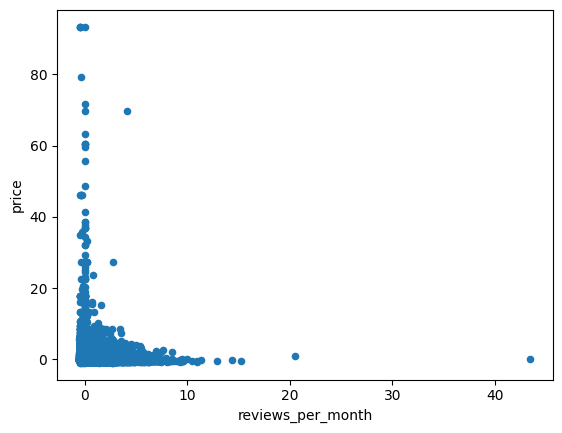

In [ ]:
# Using RobustScaler
from sklearn.preprocessing import RobustScaler
num_pipeline3 = Pipeline([
  ('imputer', SimpleImputer(strategy="median")),
  ("minmax_scaler", RobustScaler()),
    ])

df_scaler3 = num_pipeline3.fit_transform(df_modified)

df_scaled3 = pd.DataFrame(df_scaler3, columns=['number_of_reviews','reviews_per_month', 'price'])
df_scaled3.plot(kind='scatter', x='number_of_reviews', y='price')
df_scaled3.plot(kind='scatter', x='reviews_per_month', y='price')
df_scaled3.describe()

As we see, in visualizations and more importnatly in df.describe(), the differences among these three scaling methods are obvious. StandardScaler follows makes mean = 0 and scales the data to unit variance. 
MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. RobustScaler method removes the median and scales the data in the range between 1st quartile and 3rd quartile.